
# 📕 Finding the edges with Canny
In this final chapter, we'll learn how to detect edges, corners, and people's faces! Using building functions that do so really fast and with just a few lines of code. Edge detection is extensively used when we want to divide the image into areas corresponding to different objects.

## 📌Edge detection
In the previous chapter we have seen how to detect edges using the Sobel filtering technique. Now, we'll learn about one of the most used edge detection techniques, the Canny edge detection. This is widely considered to be the standard edge detection method in image processing. And produces higher accuracy detecting edges and less execution time compared with Sobel algorithm.

The detector can be applied with the canny function from the feature module of scikit-image. This function requires the image to be a 2-dimensional array, meaning, a grayscale image. So in this example, we convert the image from RGB-3 to grayscale, using the rgb2gray method from the color module that we already know from previous chapters. Then we apply the canny detector on the coin's image and obtain the resulting image.

```python
from skimage.feature import canny

# Convert image to grayscale
coins = color.rgb2gray(coins)

# Apply Canny detector
canny_edges = canny(coins)

# Show resulted image with edges
show_image(canny_edges, "Edges with Canny")
```


## 📌Canny edge detector
The first step of this algorithm is to apply a gaussian filter in order to remove noise in the image. The same gaussian filter we have seen previously in the course with the gaussian function from the filters module. So, in the canny function you can optionally set the intensity of this Gaussian filter to be applied in the image, by using the sigma attribute. The lower the value of this sigma, the less of gaussian filter effect is applied on the image, so it will spot more edges. On the other hand, if you set a higher value, more noise will be removed and the result is going to be a less edgy image. The default value of this parameter is 1. In this example we set it to 0.5, let's see the effect in the image.

```python
# Apply Canny detector with a sigma of 0.5
canny_edges_0_5 = canny(coins, sigma=0.5)

# Show resulted images with edges
show_image(canny_edges, "Sigma of 1")
show_image(canny_edges_0_5, "Sigma of 0.5")
```

Using this, resulting image will have a lot more edges than the previous one and this is because noise was removed before continuing with the rest of the steps in the algorithm.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

plt.rcParams['figure.figsize'] = (10, 8)

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

<br/>

## 📝Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

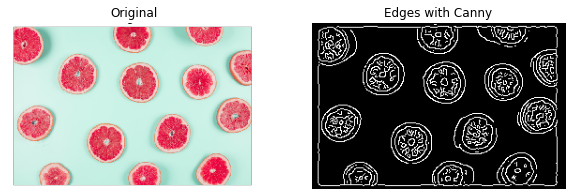

In [7]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('./sampleImages/Chapter4/toronjas.png')

# Convert image to grayscale
grapefruitb = color.rgb2gray(color.rgba2rgb(grapefruit))

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Edges with Canny")

## 📝Less edgy
et's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the <code>canny()</code> function.

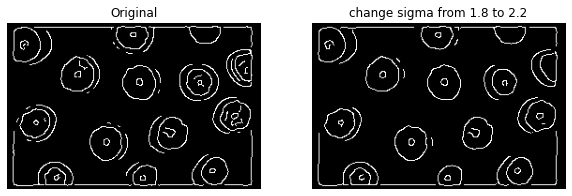

In [8]:
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Show resulting image
plot_comparison(edges_1_8, edges_2_2, 'change sigma from 1.8 to 2.2')

<br/><br/>

# 📕Corner detection
Corner detection is an approach used to extract certain types of features and infer the contents of an image. It's frequently used in motion detection, image registration, video tracking, panorama stitching, 3D modelling, and object recognition. We saw in the previous video how to detect edges with the Canny Edge detector, and before that with Sobel, in chapter 2. Edges are a type of feature in images.

<img src="./sampleImages/Chapter4/corners.png" width="60%" center/>

## 📌 Points of interest
Features are the points of interest which provide rich image content information. Points of interest are points in the image which are invariant to rotation, translation, intensity, and scale changes. (Basically, robust and reliable). There are different interest points such as corners and edges. So corner detection is basically detecting (one type of) interest points in an image.

## 📌 Corners
A corner can be defined as the intersection of two edges. Intuitively, it can also be a junction of contours.

## 📌 Matching corners
So by detecting corners as interest points, we can match objects from different perspectives. Like in this image, where we detect the corners of the original image on the left and then match them in a downscaled image in the right.

<img src="./sampleImages/Chapter4/originalVsTransformed.png" width="600" center/>

## 📌 Harris corner detector
Harris Corner Detector is a corner detection operator that is widely used in computer vision algorithms. Here, we see an original image of a building, and on the right we see the corners detected by the Harris algorithm, marked in red.

<img src="./sampleImages/Chapter4/cornersD.png" width="60%" center/>

We can access it by importing the corner_harris function from the feature module of scikit-image. This function requires grayscale images, so we need to first convert the image from rgb to gray. We can do this with the rgb2gray function we used previously. This corner_harris function gives us the Harris measure response image, meaning, the resulting image showing only the possible corners that were measured. So when we show it,

```python
from skimage.feature import corner_harris

# Convert image to grayscale
image = rgb2gray(image)

# Apply the Harris corner detector on the image
measure_image = corner_harris(image)

# Show the Harris response image
show_image(measure_image)
```
<br/>
<img src="./sampleImages/Chapter4/harrisResponse.png" width="60%" center/>

We see how only some black lines are shown. These are the approximated points where the corners candidates are.

To find the corners in the measure response image, we can use the corner_peaks function. Which will return the coordinates of the peaks of the possible corners. Optionally, we can make sure these peak corners are separated by a minimum distance, in pixels, using the min_distance parameter. Here we're setting the minimum distance between corners to 5 pixels. In this image, a total of 122 corners were found from the measure response image.

```python
# Finds the coordinates of the corners
coords = corner_peaks(corner_harris(image), min_distance=5)

print("A total of", len(coords), "corners were detected.")
```

<code>A total of 122 corners were detected.</code>

## 📌 Corners detected
```python
# Show image with marks in detected corners
show_image_with_detected_corners(image, coords)
```
<img src="./sampleImages/Chapter4/corners_detected.png" width="60%" center/>


<br/><br/>

##  📝Perspective
n this exercise, you will detect the corners of a building using the Harris corner detector.

In [10]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')


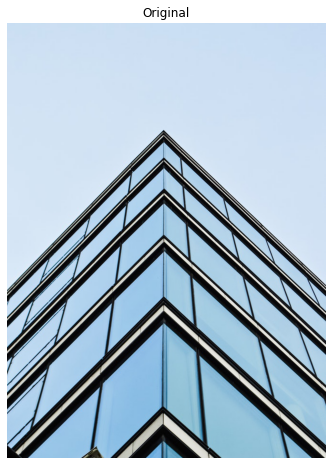

In [32]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('./sampleImages/Chapter4/corners_building_top.jpg')

# Convert image from RGB to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2, threshold_rel=0)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')

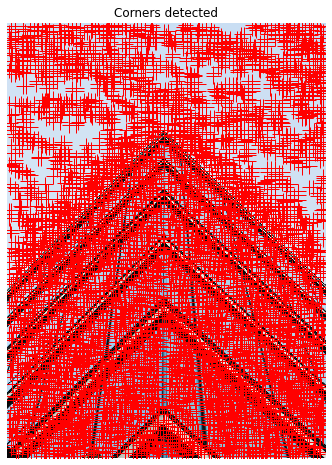

In [33]:
show_image_with_corners(building_image, coords)

<br/><br/>

##  📝Less corners
In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function.


In [36]:
coords_w_min_2 = corner_peaks(measure_image, min_distance=2, threshold_rel=0)
print("\nWith a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40, threshold_rel=0)
print('With a min_distance set to 40, we detect a total', len(coords_w_min_40), 'corners in the image.\n')


With a min_distance set to 2, we detect a total 6182 corners in the image.
With a min_distance set to 40, we detect a total 58 corners in the image.



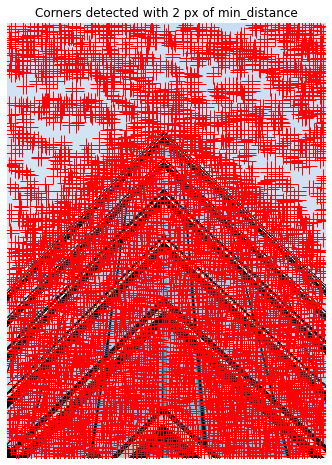

In [37]:
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")

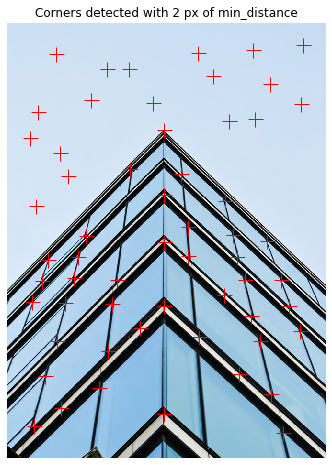

In [38]:
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 2 px of min_distance")

<br/><br/>

# 📕Face detection
In the past couple of years, face detection has attracted a lot of attention and caused a great impact on automated processes through artificial vision. 

## 📌 Face detection use cases
- Filters
- Auto focus
- Recommendations
- Blur for privacy protection
- To recognize emotions later on

## 📌 Detecting faces with scikit-image
With scikit-image, we can detect faces using a machine learning classifier, with just a couple of lines! In this course, we won't cover machine learning concepts in depth, but it's important to know that we use a cascade of classifiers, which is like multiple classifiers in one. You can also use it for other things, like cats, objects, or profile faces, from a side view.

<img src="./sampleImages/Chapter4/face_detection.png" width="70%" center/>

To use the face detector, we import the Cascade class from the feature module. This detection framework needs an xml file, from which the trained data can be read. In this case we'll use frontal face files that are included in the data module of scikit-image. Then initialize the detector, using the Cascade class constructor. Great, we now have the detector ready to be used on images.

```python
# Import the classifier class
from skimage.feature import Cascade

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)
```

## 📌 Detecting faces
To apply the detector on images, we need to use the detect_multi_scale method, from the same cascade class. This method searches for the object, in this case a face. It creates a window that will be moving through the image until it finds something similar to a human face.\

<img src="./sampleImages/Chapter4/ins.png" width="400" center/>

Searching happens on multiple scales. The window will have a minimum size, to spot the small or far-away faces. And a maximum size to also find the larger faces in the image.\
So this method takes the **input image** as the first parameter, a **scale factor**, by which the searching window is multiplied in each step, a **step ratio**, in which 1 represents an exhaustive search and usually is slow. By setting this parameter to higher values the results will be worse but the computation will be much faster. Usually, values in the interval 1 to 1.5 give good results. Then the **minimum and maximum window size** are defined. These specify the interval for the search windows that are applied to the input image to detect the faces.

```python
detected = detector.detect_multi_scale(img=image, 
                                       scale_factor=1.2,
                                       step_ratio=1, 
                                       min_size=(10, 10),
                                       max_size=(200, 200))
```

## 📌 Detected faces
The detector will return the coordinates of the box that contains the face. When printing the result, we see that it's a dictionary, where r represents the row position of the top left corner of the detected window, c is the column position pixel, width is width of detected window, and height, the height of the detected window. We'll use a function that shows the original image with the detected face marked with red lines, forming a box containing the face.

```python
print(detected)
# Show image with detected face marked
show_detected_face(image, detected)
```
<code>Detected face: [{'r': 115, 'c': 210, 'width': 167, 'height': 167}]</code>

<img src="./sampleImages/Chapter4/ins_detect.png" width="400" center/>

#### Show detected faces
With this function I draw a rectangle around detected faces. We won't discuss this function in detail here

```python
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
```

<br/><br/>

##  📝Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.

In [39]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

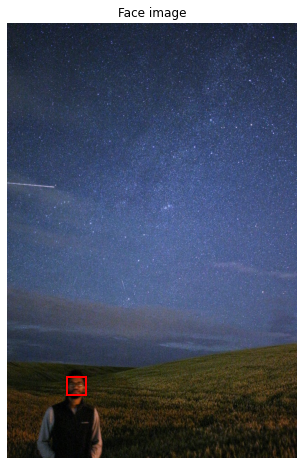

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


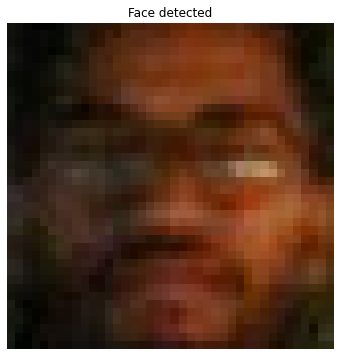

In [42]:
from skimage import data
from skimage.feature import Cascade

night_image = imread('./sampleImages/Chapter4/face_det3.jpg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

<br/><br/>

##  📝Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

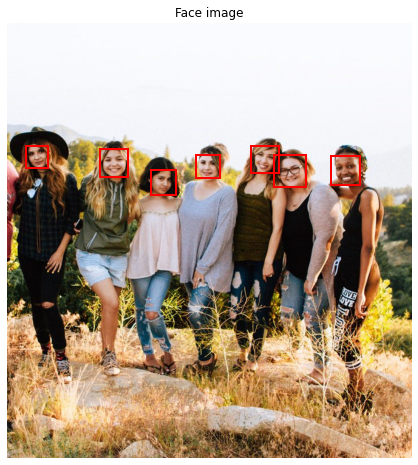

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


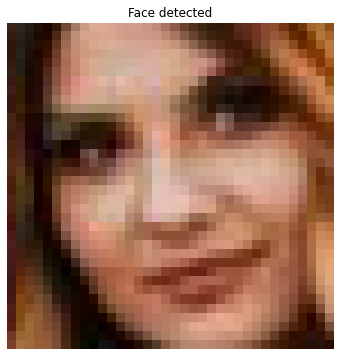

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


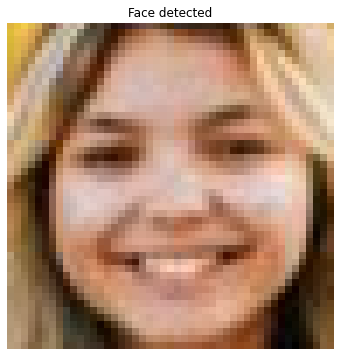

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


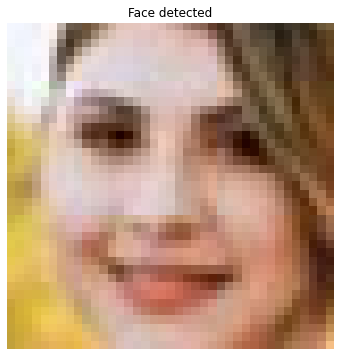

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


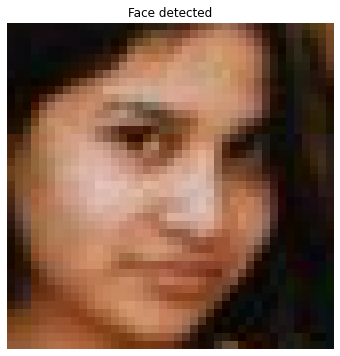

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


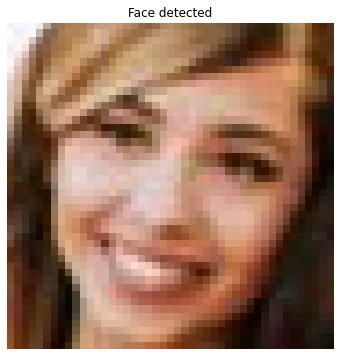

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


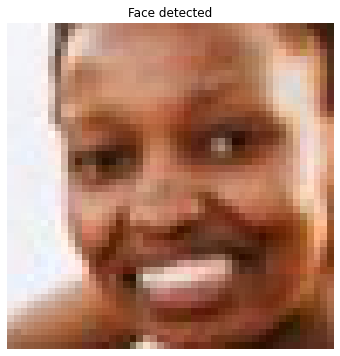

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


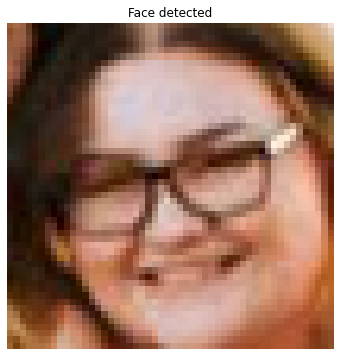

In [43]:
friends_image = imread('./sampleImages/Chapter4/face_det_friends.jpg')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show detected faces
show_detected_face(friends_image, detected)

<br/><br/>

##  📝Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the <code>slic()<code/> function for segmentation, pre-process the image before passing it to the face detector.

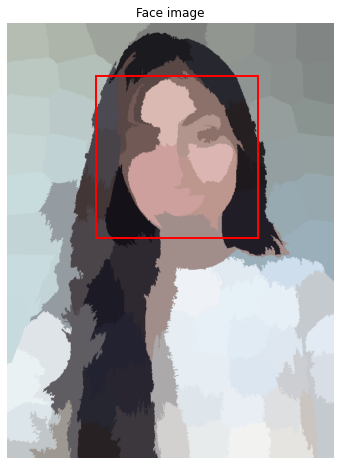

{'r': 108, 'c': 180, 'width': 328, 'height': 328}


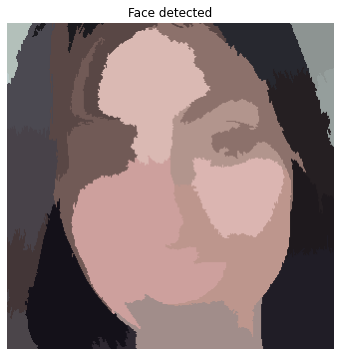

In [46]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = imread('./sampleImages/Chapter4/face_det.jpg')

# Obtain the segmentation with default 100 regions
segments = slic(profile_image, start_label=1)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg', bg_label=0)

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)